In [ ]:
import numpy as np
import pandas as pd

#Get data from the cvs file

!wget -O surveyDataSience.csv https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/surveyDataSience.csv

data_df = pd.read_csv("surveyDataSience.csv")


--2025-03-09 16:11:34--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/surveyDataSience.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35220982 (34M) [text/plain]
Saving to: ‘surveyDataSience.csv’

surveyDataSience.cs 100%[===================>]  33.59M  47.9MB/s    in 0.7s    

2025-03-09 16:12:27 (47.9 MB/s) - ‘surveyDataSience.csv’ saved [35220982/35220982]



<ipython-input-2-d09890e9dc16>:8: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("surveyDataSience.csv")


In [ ]:
def number_of_respondents(data_df):
  """
  Calculate the number of responses for the survey
  :param: data_df - dataset
  :return: integer, number of respondents
  """
  num_respondents = data_df.shape[0] - 1
  return num_respondents


num = number_of_respondents(data_df)
print(f"Number of respondents: {num}")

Number of respondents: 25973


In [ ]:
import pandas as pd

def group_questions(data_df):
  """
  Group the questions based on the base question
  :param: data_df - dataset
  :return: dictionary, question groups
  """
  question_groups = {}
  for col in data_df.columns:
      parts = col.split('_')
      base_question = parts[0]
      # Adăugăm coloana la grupul ei
      if base_question not in question_groups:
          question_groups[base_question] = []
      question_groups[base_question].append(col)
  return question_groups

question_groups = group_questions(data_df)

num_unique_questions = len(question_groups)

print(f"Number of unique questions: {num_unique_questions}")


def data_type(data_df):
  """
  Determine the data type for every atribute, every question
  :param: data_df - dataset
  :return: dictionary, data types
  """
  data_types = {}
  for question, columns in question_groups.items():
    column_subset = data_df[columns]
    column_subset = column_subset.iloc[2:]

    numeric_cols = column_subset.apply(pd.to_numeric, errors='coerce')
    if numeric_cols.notna().all().all():
      if (numeric_cols % 1 == 0).all().all():
        dtype = 'int'
      else:
        dtype = 'float'
    else:
      dtype = 'string'
    data_types[question] = dtype
  return data_types

data_types = data_type(data_df)

print("Data types for each question:")
for question, dtype in data_types.items():
    print(f"{question}: {dtype}")


Number of unique questions: 43
Data types for each question:
Time from Start to Finish (seconds): int
Q1: string
Q2: string
Q3: string
Q4: string
Q5: string
Q6: string
Q7: string
Q8: string
Q9: string
Q10: string
Q11: string
Q12: string
Q13: string
Q14: string
Q15: string
Q16: string
Q17: string
Q18: string
Q19: string
Q20: string
Q21: string
Q22: string
Q23: string
Q24: string
Q25: string
Q26: string
Q27: string
Q28: string
Q29: string
Q30: string
Q31: string
Q32: string
Q33: string
Q34: string
Q35: string
Q36: string
Q37: string
Q38: string
Q39: string
Q40: string
Q41: string
Q42: string


In [ ]:
data_df = pd.read_csv("surveyDataSience.csv")

In [ ]:
import pandas as pd
import os

def new_cvs_yes_for_complete_answers(data_df):
  """
  Create a new cvs file that contains for every question if it has an answer and completes
  with yes if it is provided an answer and no otherwise
  :param: data_df - dataset
  :return: string, path to the new cvs file
  """
  question_groups = group_questions(data_df)


  for question, columns in question_groups.items():
      data_df[question] = data_df[columns].apply(
          lambda row: 'Yes' if any(pd.notna(row[col]) for col in columns) else 'No', axis=1
      )

  output_file = "/content/all_questions_summary.csv"
  data_df[list(question_groups.keys())].to_csv(output_file, index=False)

  return output_file

output_file = new_cvs_yes_for_complete_answers(data_df)

#from google.colab import files
#files.download(output_file)

def complete_respondents(data_df, output_file):
  """
  Calculate the number of respondents that completed the survey
  :param: data_df - dataset
  :param: output_file - path to the new cvs file
  :return: integer, number of respondents that completed the survey
  """
  df_saved = pd.read_csv(output_file)
  total_respondents_no = (df_saved == 'No').any(axis=1).sum()

  df_saved = df_saved.shape[0]
  tot = df_saved - total_respondents_no

  return tot

tot = complete_respondents(data_df, output_file)
print(f"Numărul total de respondenti completi: {tot}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Numărul total de respondenti completi: 202


In [ ]:
data_df = pd.read_csv("surveyDataSience.csv")

<ipython-input-18-65b021bbaa6a>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("surveyDataSience.csv")


In [ ]:
"""
Clean the data
"""
data_df["Q4"] = data_df["Q4"].astype(str).str.strip()
data_df["Q3"] = data_df["Q3"].astype(str).str.strip()
data_df["Q2"] = data_df["Q2"].astype(str).str.strip()

"""
Maping the education level to years of study
"""
education_mapping = {
    "Some college/university study without earning a bachelor’s degree": 2,
    "Bachelor’s degree": 3,
    "Master’s degree": 5,
    "Doctoral degree": 8,
    "Professional degree": 5,
    "No formal education past high school": 0
}
def mean_years_of_study(data_df):
  """
  Calculate the mean years of study for all respondents
  :param data_df: dataset
  :return: float, mean years of study for all respondents
  """
  return data_df["Q4"].map(education_mapping).fillna(0)

def romania_mean_years_of_study(data_df):
    """
    Calculate the mean years of study for respondents from Romania
    :param data_df: dataset
    :return: float, mean years of study for respondents from Romania
    """
    romania_df = data_df[data_df["Q3"] == "Romania"]
    return romania_df["Q4"].map(education_mapping).fillna(0)

def romania_women_mean_years_of_study(data_df):
    """
    Calculate the mean years of study for women respondents from Romania
    :param data_df: dataset
    :return: float, mean years of study for respondents from Romania and women
    """
    romania_women_df = data_df[(data_df["Q3"] == "Romania") & (data_df["Q2"] == "Woman")]
    return romania_women_df["Q4"].map(education_mapping).fillna(0)


"""
Calculate the mean years of study for all respondents, respondents from Romania, and respondents from Romania and women
"""
overall_mean = mean_years_of_study(data_df).mean()
romania_mean = romania_mean_years_of_study(data_df).mean()
romania_women_mean = romania_women_mean_years_of_study(data_df).mean()

print(f"Durata medie a studiilor pentru toți respondenții: {overall_mean:.2f} ani")
print(f"Durata medie a studiilor pentru respondenții din România: {romania_mean:.2f} ani")
print(f"Durata medie a studiilor pentru femeile din România: {romania_women_mean:.2f} ani")

Durata medie a studiilor pentru toți respondenții: 4.09 ani
Durata medie a studiilor pentru respondenții din România: 4.33 ani
Durata medie a studiilor pentru femeile din România: 4.88 ani


In [ ]:
data_df = pd.read_csv("surveyDataSience.csv")

<ipython-input-21-65b021bbaa6a>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("surveyDataSience.csv")


In [ ]:
import pandas as pd
import os

def create_file_for_complete_answers_from_women(data_df):
  """
  Create a cvs file that contains for every question if it has an answer and completes
  with yes if it is provided an answer and no otherwise for women
  :param: data_df - dataset
  :return: string, path to the new cvs file
  """
  question_groups = group_questions(data_df)

  romania_women_df = data_df[(data_df["Q3"] == "Romania") & (data_df["Q2"] == "Woman")].copy()
  for question, columns in question_groups.items():
        romania_women_df[question] = romania_women_df[columns].apply(
          lambda row: 'Yes' if any(pd.notna(row[col]) for col in columns) else 'No', axis=1
      )

  output_file_2 = "/content/all_questions_summary_women.csv"
  romania_women_df[list(question_groups.keys())].to_csv(output_file_2, index=False)

  return output_file_2

output_file_2 = create_file_for_complete_answers_from_women(data_df)

def complete_respondents_women(data_df, output_file_2):
  """
  Calculate the number of women respondents that completed the survey
  :param: data_df - dataset
  :param: output_file_2 - path to the new cvs file
  :return: integer, number of women respondents that completed the survey
  """
  df_saved = pd.read_csv(output_file_2)
  total_respondents_no = (df_saved == 'No').any(axis=1).sum()

  df_saved = df_saved.shape[0]
  tot = df_saved - total_respondents_no

  return tot

total_femei = complete_respondents_women(data_df, output_file_2)
print(f"Numărul total de femei care au completat întrebările: {total_femei}")


Numărul total de femei care au completat întrebările: 0


In [ ]:
data_df = pd.read_csv("surveyDataSience.csv")

<ipython-input-40-65b021bbaa6a>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("surveyDataSience.csv")


In [ ]:
import pandas as pd

def parse_languages(row):
    """
    Parse the languages from the row
    :param: row - row from the dataset
    :return: list, list of languages
    """
    return row.split(';') if isinstance(row, str) else []

def romania_women_that_code_in_python_c_answer_file(data_df):
  """
  Create a cvs file that contains all the women that answerd the survey and a list with all
  the programming languages that the women use
  :param: data_df - dataset
  :return: string, output file name
  :return: dataFrame with all the women that completed the survey
  """
  question_groups = group_questions(data_df)

  women_df = data_df[data_df["Q2"] == "Woman"].copy()

  q7_columns = [col for col in data_df.columns if col.startswith("Q7")]
  women_df["Q7_combined"] = women_df[q7_columns].astype(str).apply(lambda x: ';'.join(x.dropna()), axis=1)

  required_columns = ["Q2", "Q7_combined"]
  complete_women = women_df.dropna(subset=required_columns)

  complete_women["Q7_combined"] = complete_women["Q7_combined"].apply(parse_languages)

  responses_output_file = "women_programming_responses.csv"
  complete_women.to_csv(responses_output_file, index=False)

  return responses_output_file, complete_women

responses_output_file, complete_women = romania_women_that_code_in_python_c_answer_file(data_df)

def women_in_python_age_number(data_df, responses_output_file, complete_women):
  """
  Calculate the number of women that code in Python
  :param: data_df - dataset
  :param: responses_output_file - path to the new cvs
  :return: integer, number of women that code in Python
  :return: string, age group with the most women that code in Python
  """
  num_python = complete_women[complete_women["Q7_combined"].apply(lambda x: "Python" in x)].shape[0]
  age_group_python = complete_women[complete_women["Q7_combined"].apply(lambda x: "Python" in x)]["Q1"].mode()[0]
  return num_python, age_group_python

def women_in_cpp_age_number(data_df, responses_output_file, complete_women):
  """
  Calculate the number of women that code in C++
  :param: data_df - dataset
  :param: responses_output_file - path to the new cvs
  :return: integer, number of women that code in C++
  :return: string, age group with the most women that code in C++
  """
  num_cpp = complete_women[complete_women["Q7_combined"].apply(lambda x: "C++" in x)].shape[0]
  age_group_cpp = complete_women[complete_women["Q7_combined"].apply(lambda x: "C++" in x)]["Q1"].mode()[0]

  return num_cpp, age_group_cpp

num_python, age_group_python = women_in_python_age_number(data_df, responses_output_file, complete_women)
num_cpp, age_group_cpp = women_in_cpp_age_number(data_df, responses_output_file, complete_women)

print(f"Numărul de femei care programează în Python: {num_python}")
print(f"Intervalul de vârstă cu cele mai multe femei care programează în Python: {age_group_python}")
print(f"Numărul de femei care programează în C++: {num_cpp}")
print(f"Intervalul de vârstă cu cele mai multe femei care programează în C++: {age_group_cpp}")


Numărul de femei care programează în Python: 3877
Intervalul de vârstă cu cele mai multe femei care programează în Python: 18-21
Numărul de femei care programează în C++: 972
Intervalul de vârstă cu cele mai multe femei care programează în C++: 18-21


In [ ]:
df = pd.read_csv("surveyDataSience.csv")


<ipython-input-72-89a6096e1647>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("surveyDataSience.csv")


In [ ]:

import pandas as pd
import re

def extract_choice(value):
  """
  Extract the choice from the value
  :param: value - value from the dataset
  :return: string, choice
  """
  if isinstance(value, str) and "Selected Choice - " in value:
    return value.split("Selected Choice - ", 1)[-1].strip()
  return None

def numeric_non_numeric_multiple_chioce_answers(df):
  """
  Calculate the numeric, non_numeric and multiple choice answers
  :param: df - dataset
  :return: dictionary, numeric summary
  :return: dictionary, non_numeric summary
  :return: dictionary, question choices
  """

  numeric_columns = df.select_dtypes(include=['number']).columns
  numeric_summary = df[numeric_columns].agg(['min', 'max']).T if not numeric_columns.empty else "Nu există coloane numerice."

  non_numeric_columns = df.select_dtypes(exclude=['number']).columns
  non_numeric_summary = df[non_numeric_columns].apply(lambda x: x.nunique(), axis=0) if not non_numeric_columns.empty else "Nu există coloane nenumerice."

  question_parts = {}
  questions_answers = {}
  for col in df.columns:
      if "_Part" in col:
          base_question = col.split("_Part")[0]  # Extragem partea comună (ex: "Q7")
          if base_question not in question_parts:
              question_parts[base_question] = []
          question_parts[base_question].append(col)

  question_choices = {}
  for question, parts in question_parts.items():
      unique_choices = set()
      for part in parts:
          df[part] = df[part].astype(str).apply(extract_choice)  # Extragem doar răspunsurile relevante
          choices = set(df[part].dropna().unique())
          unique_choices.update(choices)

      if unique_choices:
          question_choices[question] = sorted(unique_choices)

  return numeric_summary, non_numeric_summary, question_choices

numeric_summary, non_numeric_summary, question_choices = numeric_non_numeric_multiple_chioce_answers(df)

print("### Atribute numerice (Min/Max) ###")
print(numeric_summary)

print("\n### Atribute nenumerice (Număr de valori distincte) ###")
print(non_numeric_summary)

print("\n### Liste de răspunsuri posibile pentru întrebările cu multiple părți ###")
for question, choices in question_choices.items():
    print(f"{question}: {choices}")

### Atribute numerice (Min/Max) ###
Nu există coloane numerice.

### Atribute nenumerice (Număr de valori distincte) ###
Time from Start to Finish (seconds)    5410
Q1                                       12
Q2                                        6
Q3                                       67
Q4                                        8
                                       ... 
Q38_B_Part_8                              2
Q38_B_Part_9                              2
Q38_B_Part_10                             2
Q38_B_Part_11                             1
Q38_B_OTHER                               2
Length: 369, dtype: int64

### Liste de răspunsuri posibile pentru întrebările cu multiple părți ###
Q7: ['Bash', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'MATLAB', 'None', 'Python', 'R', 'SQL', 'Swift']
Q9: ['Jupyter (JupyterLab, Jupyter Notebooks, etc)', 'Jupyter Notebook', 'MATLAB', 'None', 'Notepad++', 'PyCharm', 'RStudio', 'Spyder', 'Sublime Text', 'Vim / Emacs', 'Visual Studio', 'Visu

In [ ]:
df = pd.read_csv("surveyDataSience.csv")

<ipython-input-76-89a6096e1647>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("surveyDataSience.csv")


In [ ]:
import pandas as pd
import numpy as np



# Mapare manuală a intervalelor în valori numerice (mijlocul intervalului)
experience_mapping = {
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25
}

def min_max_mean_median_std(df):
  """
  Calculate the min, max, mean, median and standard deviation of the experience column
  :param: df - dataset
  :return: float, min experience
  :return: float, max experience
  :return: float, mean experience
  """
  experience_column = "Q6"

  df["Experience (Years)"] = df[experience_column].map(experience_mapping).copy()

  df_clean = df["Experience (Years)"].dropna()

  min_exp = df_clean.min()
  max_exp = df_clean.max()
  mean_exp = df_clean.mean()
  median_exp = df_clean.median()
  std_exp = df_clean.std()

  return min_exp, max_exp, mean_exp, median_exp, std_exp

min_exp, max_exp, mean_exp, median_exp, std_exp = min_max_mean_median_std(df)

# Afișăm rezultatele
print(f"Minim: {min_exp} ani")
print(f"Maxim: {max_exp} ani")
print(f"Media: {mean_exp:.2f} ani")
print(f"Mediana: {median_exp} ani")
print(f"Deviația standard: {std_exp:.2f} ani")


Minim: 0.5 ani
Maxim: 25.0 ani
Media: 5.50 ani
Mediana: 2.0 ani
Deviația standard: 6.84 ani


In [ ]:
df = pd.read_csv("surveyDataSience.csv")

<ipython-input-78-89a6096e1647>:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("surveyDataSience.csv")


<ipython-input-80-c60cfabda813>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")


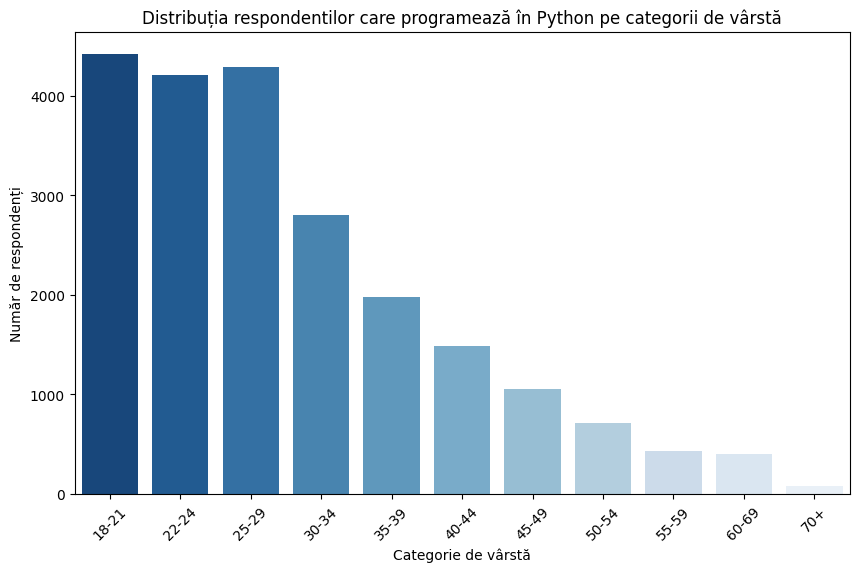

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def age_graph(df):
  """
  Determine the graph for the age of the respondents that code in Python
  :param: df - dataset
  :return: graph
  """
  age_column = "Q1"
  programming_column = "Q7_Part_1"

  df = df.iloc[3:].reset_index(drop=True)

  df_python = df[df[programming_column].str.contains("Python", na=False, case=False)]

  age_distribution = df_python[age_column].value_counts().sort_index()


  plt.figure(figsize=(10, 6))
  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")
  plt.xlabel("Categorie de vârstă")
  plt.ylabel("Număr de respondenți")
  plt.title("Distribuția respondentilor care programează în Python pe categorii de vârstă")
  plt.xticks(rotation=45)
  plt.show()

age_graph(df)

<ipython-input-81-7868813fba39>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")


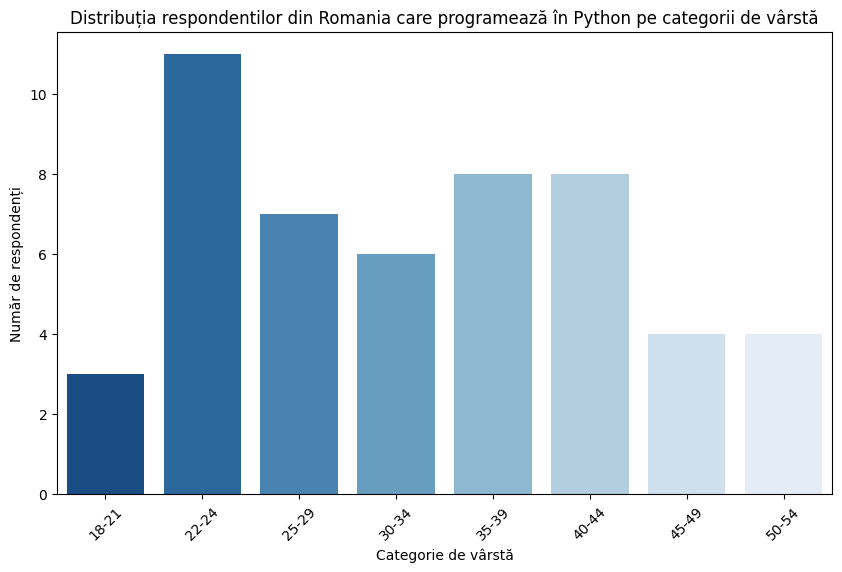

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def romania_python_coders(df):
  """
  Determine the graph for the age of the respondents from Romania that code in Python
  :param: df - dataset
  :return: graph
  """
  age_column = "Q1"
  programming_column = "Q7_Part_1"
  country_column = "Q3"

  df = df.iloc[3:].reset_index(drop=True)

  df_ro = df[df[country_column] == "Romania"]

  df_python = df_ro[df_ro[programming_column].str.contains("Python", na=False, case=False)].copy()

  age_distribution = df_python[age_column].value_counts().sort_index()

  # Creăm graficul
  plt.figure(figsize=(10, 6))
  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")
  plt.xlabel("Categorie de vârstă")
  plt.ylabel("Număr de respondenți")
  plt.title("Distribuția respondentilor din Romania care programează în Python pe categorii de vârstă")
  plt.xticks(rotation=45)  # Rotim etichetele pentru lizibilitate
  plt.show()

romania_python_coders(df)

<ipython-input-82-eb0b079665ba>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")


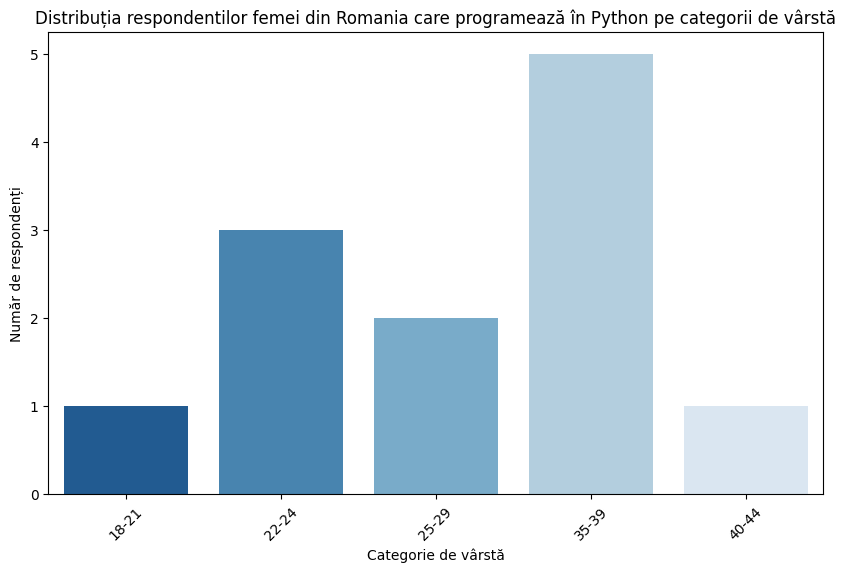

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def woman_python_graph(df):
  """
  Determine the graph for the age of the women respondents that code in Python
  :param: df - dataset
  :return: graph
  """
  age_column = "Q1"
  programming_column = "Q7_Part_1"
  country_column = "Q3"
  gender_column = "Q2"

  df = df.iloc[3:].reset_index(drop=True)

  df_women = df[df[gender_column] == "Woman"]
  df_ro = df_women[df_women[country_column] == "Romania"]

  df_python = df_ro[df_ro[programming_column].str.contains("Python", na=False, case=False)]

  age_distribution = df_python[age_column].value_counts().sort_index()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="Blues_r")
  plt.xlabel("Categorie de vârstă")
  plt.ylabel("Număr de respondenți")
  plt.title("Distribuția respondentilor femei din Romania care programează în Python pe categorii de vârstă")
  plt.xticks(rotation=45)
  plt.show()

woman_python_graph(df)

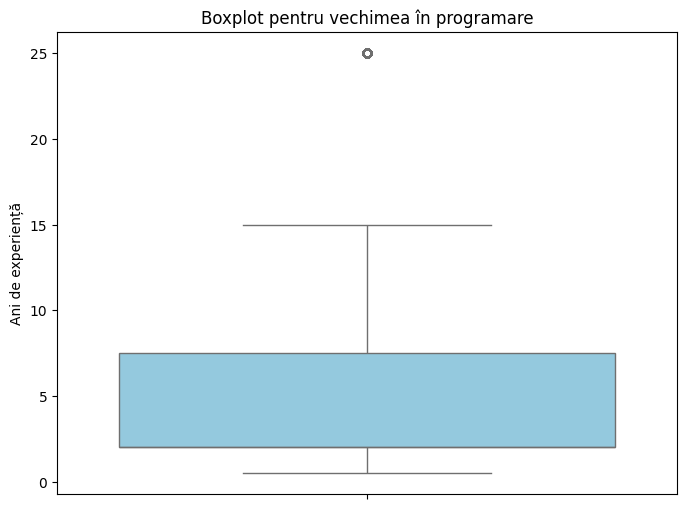

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def outliner(df):
  """
  Determine the graph for the age of the respondents that code in Python
  :param: df - dataset
  :return: graph
  """
  df = df.iloc[3:].reset_index(drop=True)

  experience_column = "Q6"

  # Dicționar pentru a înlocui intervalele cu media acestora
  experience_mapping = {
      "< 1 years": 0.5,
      "1-3 years": 2,
      "3-5 years": 4,
      "5-10 years": 7.5,
      "10-20 years": 15,
      "20+ years": 25
  }

  df["Experience (years)"] = df[experience_column].map(experience_mapping).copy()

  # Eliminăm valorile NaN pentru analiza outlierilor
  df_filtered = df.dropna(subset=["Experience (years)"])

  # Calculăm Q1, Q3 și IQR
  Q1 = df_filtered["Experience (years)"].quantile(0.25)
  Q3 = df_filtered["Experience (years)"].quantile(0.75)
  IQR = Q3 - Q1

  # Definim limitele pentru outlieri
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identificăm outlierii
  outliers = df_filtered[(df_filtered["Experience (years)"] < lower_bound) |
                          (df_filtered["Experience (years)"] > upper_bound)]

  # Creăm boxplot-ul
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_filtered["Experience (years)"], color="skyblue")
  plt.ylabel("Ani de experiență")
  plt.title("Boxplot pentru vechimea în programare")
  plt.show()

outliner(df)

In [ ]:
#Problema 2


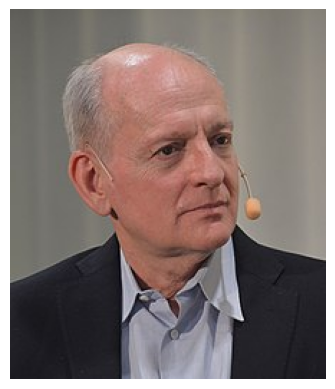

In [ ]:
import requests
import random
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def image_getter():
  """
  Getter for image file with api_url
  :return: list, list of image files
  """
  api_url = "https://api.github.com/repos/lauradiosan/AI-UBB/contents/2024-2025/labs/lab02/data/images"

  response = requests.get(api_url)
  if response.status_code == 200:
      files = response.json()

      # Filtrăm doar imaginile (fișiere cu extensii .jpg, .png, .jpeg)
      image_files = [file["name"] for file in files if file["name"].endswith((".jpg", ".png", ".jpeg"))]
  return image_files

def image_show():
  """
  Image pick from github file
  :return: image, image
  """
  image_files = image_getter()
  if image_files:
    selected_image = random.choice(image_files)
    raw_url = f"https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/images/{selected_image}"

    img_response = requests.get(raw_url)
    if img_response.status_code == 200:
      image = Image.open(BytesIO(img_response.content))
  return image

image =image_show()


plt.imshow(image)
plt.axis("off")
plt.show()



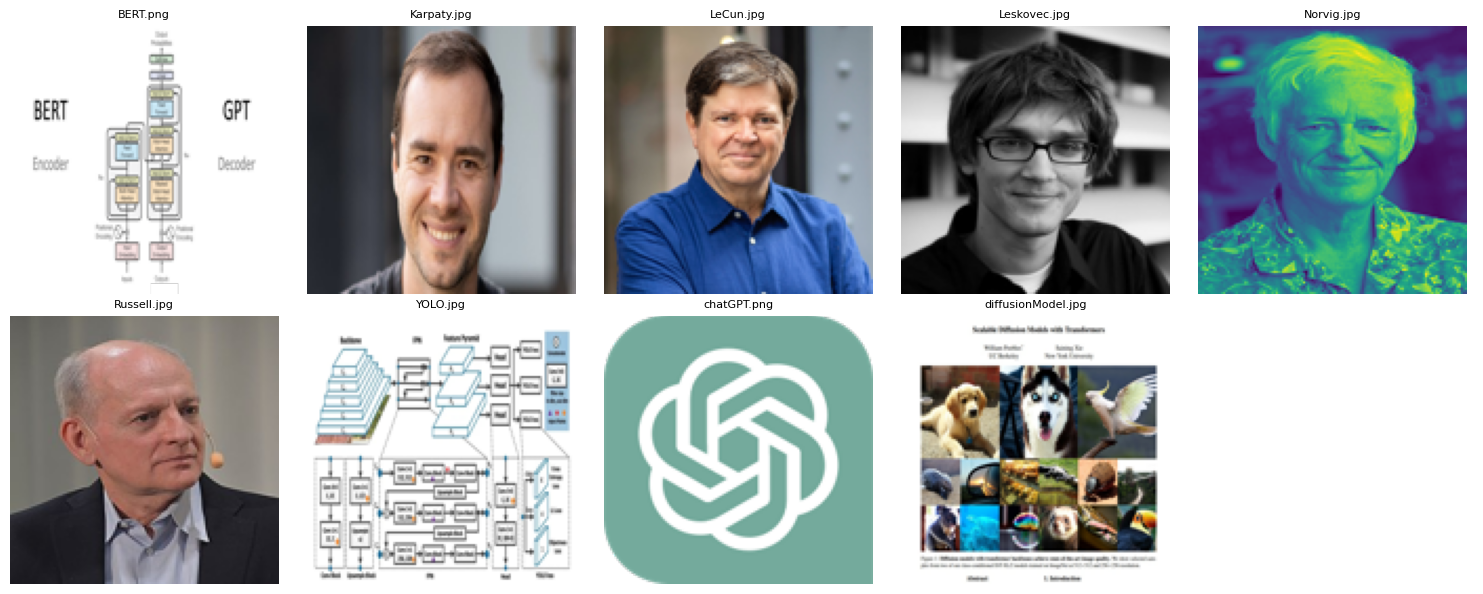

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import math

def image_resize():
  """
  Resize the images from github file to 128*128 pixels
  :return: graph
  """
  image_files = image_getter()
  if image_files:
    images = []
    for img_name in image_files:
        raw_url = f"https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/images/{img_name}"
        img_response = requests.get(raw_url)
        if img_response.status_code == 200:
          image = Image.open(BytesIO(img_response.content))
          image = image.resize((128, 128))
          images.append((img_name, image))

    num_images = len(images)
    cols = 5  # Număr de coloane în grid
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()

    for ax, (name, img) in zip(axes, images):
        ax.imshow(img)
        ax.set_title(name, fontsize=8)
        ax.axis("off")

    for ax in axes[num_images:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
  else:
    print("Nu s-au găsit imagini în acest folder.")

image_resize()


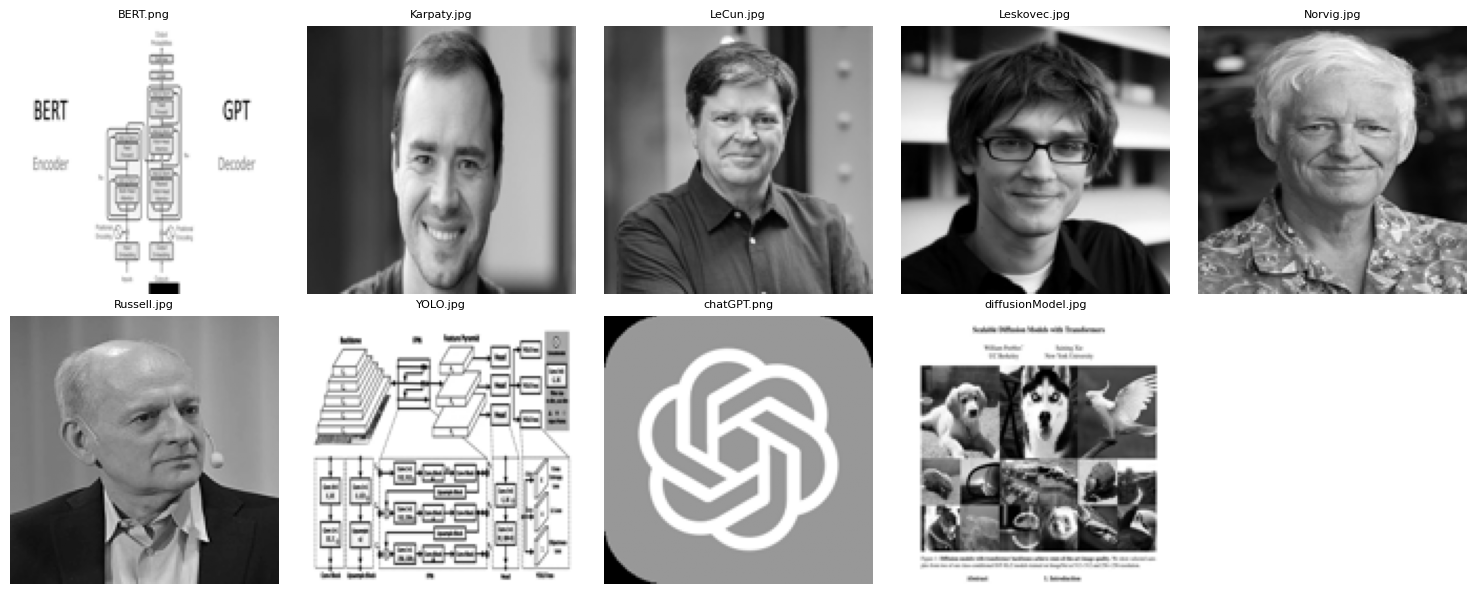

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import math

def gray_levels_before_after():
  """
  Transforms all the images in gray_level
  :return: graph
  """
  image_files = image_getter()

  if image_files:
    images = []
    for img_name in image_files:
      raw_url = f"https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/images/{img_name}"
      img_response = requests.get(raw_url)
      if img_response.status_code == 200:
        image = Image.open(BytesIO(img_response.content))
        grayscale_image = image.convert("L")  # Convertim în gray-levels
        grayscale_image = grayscale_image.resize((128, 128))
        images.append((img_name, grayscale_image))

    num_images = len(images)
    cols = 5
    rows = math.ceil(num_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()

    for ax, (name, img) in zip(axes, images):
      ax.imshow(img, cmap="gray")
      ax.set_title(name, fontsize=8)
      ax.axis("off")

    for ax in axes[num_images:]:
     ax.axis("off")

    plt.tight_layout()
    plt.show()

gray_levels_before_after()




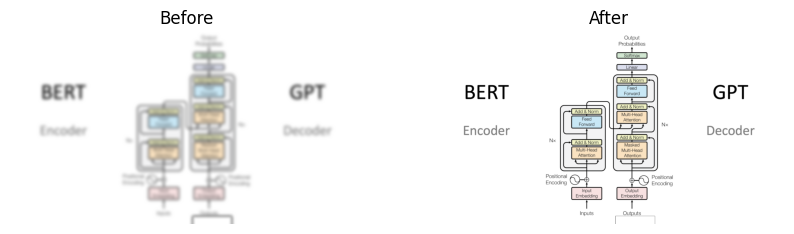

In [ ]:
import requests
import random
from PIL import Image, ImageFilter
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt

def before_after_blurred():
    """
    Blurs the images from github file
    :return: graph
    """
    image_files = image_getter()

    image = image_show()
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius = 9))
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(blurred_image)
    plt.title("Before")
    plt.axis("off")


    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title("After")
    plt.axis("off")

    plt.show()

before_after_blurred()

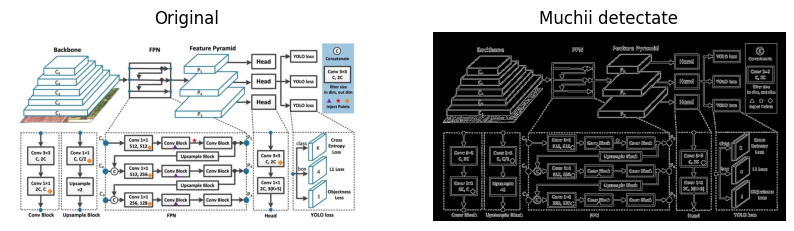

In [ ]:
import requests
import random
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt

def before_after_contour():
    image_files = image_getter()

    image = image_show()

    gray_pil = image.convert("L")  # PIL grayscale
    gray = np.array(gray_pil)  # Convertim în array NumPy (format OpenCV)

    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    plt.figure(figsize=(10, 5))

    # Imaginea originală
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

   # Imaginea cu muchii detectate
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Muchii detectate")
    plt.axis("off")

    plt.show()

before_after_contour()


In [ ]:
#Problema 3

In [ ]:
!wget -O texts.txt https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/texts.txt
def read_file():
  """
  Read the file from github
  :return: text
  """
  with open("texts.txt", "r", encoding="utf-8") as file:
    text = file.read()
  return text
text = read_file()

--2025-03-09 18:41:15--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/texts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1147 (1.1K) [text/plain]
Saving to: ‘texts.txt’

texts.txt           100%[===================>]   1.12K  --.-KB/s    in 0s      

2025-03-09 18:41:16 (62.6 MB/s) - ‘texts.txt’ saved [1147/1147]



In [ ]:
def sentences_text(text):
  """
  Determine the number of sentences in the text
  :param: text - text
  :return: num_sentences - number of sentences
  """
  sentences = re.split(r'(?<=[.!?])\s+', text.strip())
  num_sentences = len(sentences)

  return num_sentences

num_sentences = sentences_text(text)
print(f"Numărul de propozitii este: {num_sentences}")

Numărul de propozitii este: 10


In [ ]:
def number_words(text):
  """
  Determine the number of words in the text
  :param: text - text
  :return: num_words - number of words
  """
  words = re.findall(r'\b\w+\b', text)
  num_words = len(words)

  return num_words

num_words = number_words(text)
print(f"Numărul de cuvinte este: {num_words}")

Numărul de cuvinte este: 160


In [ ]:
def different_words(text):
  """
  Determine the number of different words in the text
  :param: text - text
  :return: num_different_words - number of different words
  """
  words = re.findall(r'\b\w+\b', text)
  unique_words = set(words)
  num_different_words = len(unique_words)

  return num_different_words

num_different_words = different_words(text)
print(f"Numărul de cuvinte diferite este: {num_different_words}")

Numărul de cuvinte diferite este: 97


In [ ]:
def longest_shortest_word(text):
  """
  Determine the longest and shortest word in the text
  :param: text - text
  :return: longest_word - longest word, shortest_word - shortest word
  """
  words = re.findall(r'\b\w+\b', text)
  longest = max(words, key=len)
  shortest = min(words, key=len)

  return longest, shortest

longest_word, shortest_word = longest_shortest_word(text)
print(f"Cuvantul cel mai lung este: {longest_word}")
print(f"Cuvantul cel mai scurt este: {shortest_word}")

Cuvantul cel mai lung este: Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm
Cuvantul cel mai scurt este: o


In [ ]:
def remove_diacritics(text):
    """
    Remove diacritics.
    :param text: str, input text
    :return: str, text without diacritics
    """
    diacritics_map = {
        'ă': 'a', 'â': 'a', 'î': 'i', 'ș': 's', 'ş': 's', 'ț': 't', 'ţ': 't',
        'Ă': 'A', 'Â': 'A', 'Î': 'I', 'Ș': 'S', 'Ş': 'S', 'Ț': 'T', 'Ţ': 'T'
    }

    for diacritic, replacement in diacritics_map.items():
        text = text.replace(diacritic, replacement)

    return text

text_no_diacritics = remove_diacritics(text)

print(text_no_diacritics)


Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
Succes si sa inceapa ave

In [ ]:
import nltk
from nltk.corpus import wordnet

# Descărcăm WordNet dacă nu este deja descărcat
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...


True

In [ ]:
def normalize_word(word):
  """
    Normalize a word by removing excessive repeated letters.
    :param word: str, input word
    :return: str, normalized word
  """
  return re.sub(r'(.)\1+', r'\1', word)


def synonyms_longest_word(text):
  """
  Determine the synonyms for the longest word in the text
  :param: text - text
  :return: synonyms - synonyms for the longest word
  """
  longest, shortest = longest_shortest_word(text)
  norm_longest = normalize_word(longest)
  synonyms = set()
  for syn in wordnet.synsets(norm_longest):
      for lemma in syn.lemmas():
            synonyms.add(lemma.name())  # Adaugă sinonimele
  return list(synonyms)

synonyms = synonyms_longest_word(text)
longest, shortest = longest_shortest_word(text)
long_norm = normalize_word(longest)
print(f"Sinonime pentru '{long_norm}': {synonyms}")


Sinonime pentru 'Confirm': ['reassert', 'support', 'sustain', 'confirm', 'affirm', 'corroborate', 'substantiate']


In [ ]:
#Problema 4

In [ ]:
#Normalizare problema 1

In [ ]:
#Normalizare problema 2

Normalizare Z- score


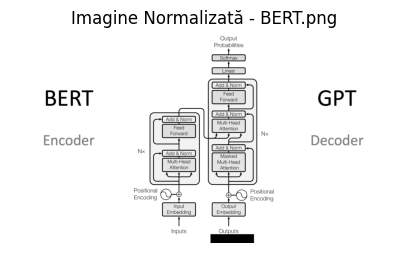

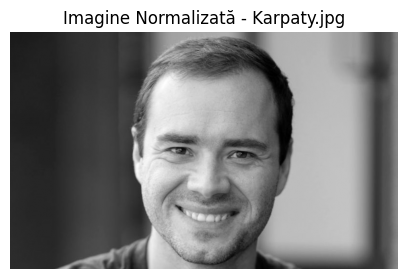

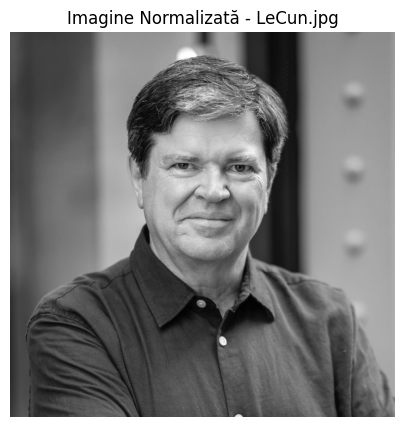

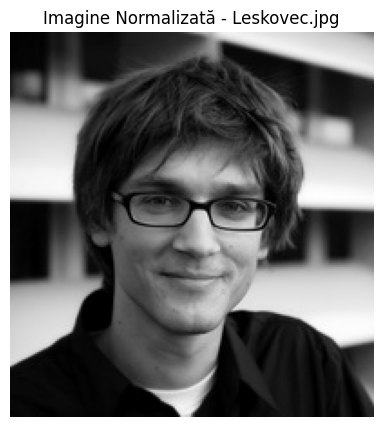

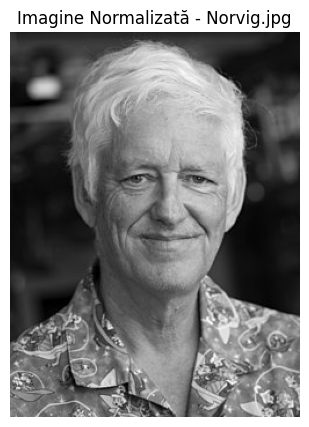

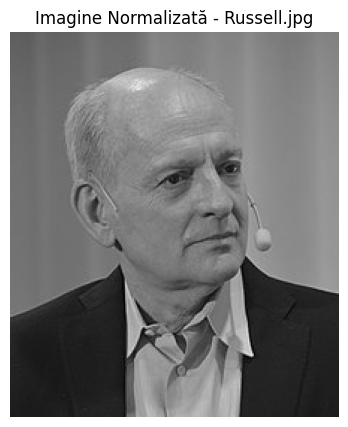

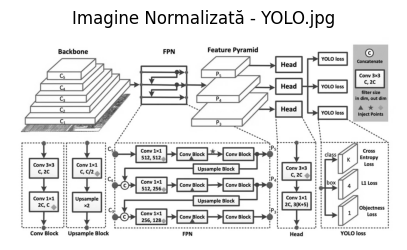

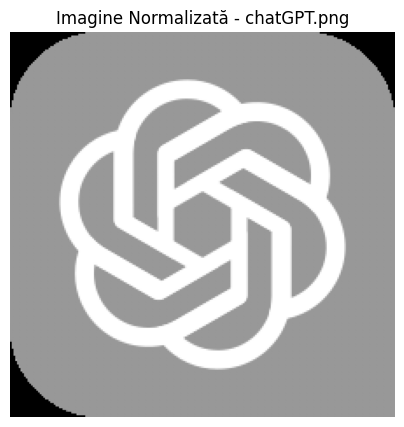

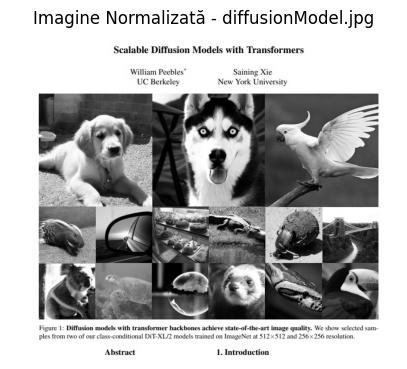

In [ ]:
image_files = image_getter()
print("Normalizare Z- score")
def normalizare_imagini(image_files):
    """
    Normalize the images from github file
    :param: image_files - list of image files
    :return: graph
    """
    for img_name in image_files:

        raw_url = f"https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/images/{img_name}"
        img_response = requests.get(raw_url)

        if img_response.status_code == 200:
            image = Image.open(BytesIO(img_response.content)).convert("L")

            # 2. Convertim în array NumPy
            image_np = np.array(image, dtype=np.float32)

            # 3. Aplicăm Z-score Normalization
            mean_pixel = np.mean(image_np)
            std_pixel = np.std(image_np)

            image_zscore = (image_np - mean_pixel) / (std_pixel + 1e-8)  # Evităm împărțirea la 0

            # 4. Scalăm pentru vizualizare (între 0 și 1)
            image_zscore_vis = (image_zscore - np.min(image_zscore)) / (np.max(image_zscore) - np.min(image_zscore))

            # 5. Afișăm imaginea normalizată
            plt.figure(figsize=(5, 5))
            plt.imshow(image_zscore_vis, cmap="gray")
            plt.title(f"Imagine Normalizată - {img_name}")
            plt.axis("off")
            plt.show()

        else:
            print(f"Eroare la descărcarea imaginii {img_name}")

normalizare_imagini(image_files)

In [ ]:
#Normalizare problema 3

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def preprocess_text(text):
  """
    Preprocess the text by splitting it into sentences and converting to lowercase.
    :param text: str, input text
    :return: list, list of sentences
  """
  sentences = re.split(r'[.!?]', text)
  sentences = [s.strip().lower() for s in sentences if s.strip()]
  return sentences

def normalized_text(sentences):
  """
    Normalize the text by counting word frequencies in each sentence.
    :param sentences: list, list of sentences
    :return: list, list of dictionaries containing word frequencies
  """
  word_counts = []
  for sentence in sentences:
    words = re.findall(r'\b\w+\b', sentence)  # Extrage doar cuvintele
    freq = {word: words.count(word) for word in set(words)}
    word_counts.append(freq)
  return word_counts

sentences = preprocess_text(text)
word_counts = normalized_text(sentences)

unique_words = sorted(set(word for freq in word_counts for word in freq))
word_matrix = np.array([[freq.get(word, 0) for word in unique_words] for freq in word_counts])

min_max_scaler = MinMaxScaler()
word_matrix_min_max = min_max_scaler.fit_transform(word_matrix)

def display_results(normalized_matrix):
  """
    Display the results of normalization.
    :param normalized_matrix: list, list of dictionaries containing normalized word frequencies
  """
  print("Min-Max Scaling: ")
  for i, sentence in enumerate(sentences):
      print(f"Propoziția {i+1}: {sentence}")
      print(f" Normalizat: {normalized_matrix[i]}")

display_results(word_matrix_min_max)


Min-Max Scaling: 
Propoziția 1: mesaj de informare: 
cursul și laboratoarele de inteligență artificială vor fi o 
provocare pentru toți
 Normalizat: [0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.66666667 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         1.         1.         0.
 0.         0.         1.         0.         0.         1.
 0.         0.         0.         1.         0.         1.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         0.